<a href="https://colab.research.google.com/github/susmitha817/salesforce/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
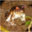

In [3]:
x_train[0]

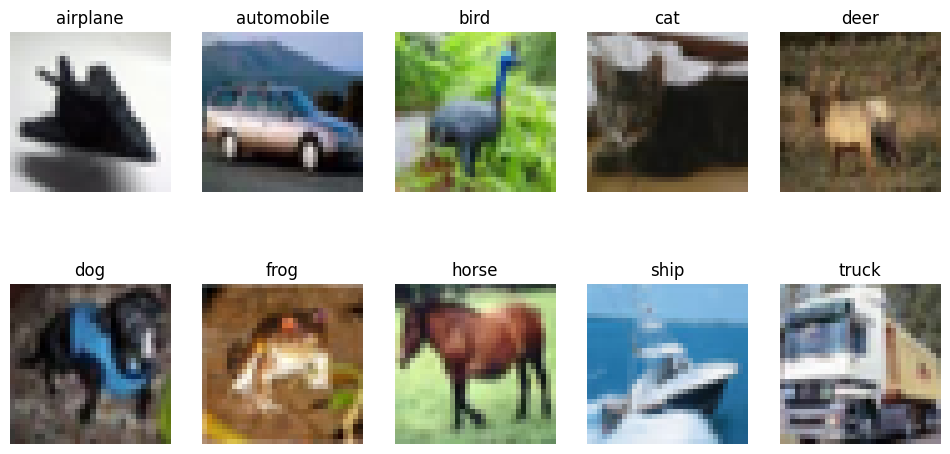

In [4]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

images = [x_train[(y_train.flatten() == i).argmax()] for i in range(10)]


plt.figure(figsize=(12, 6))
for i, image in enumerate(images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.array(x_train)
x_test=np.array(x_test)

In [6]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [8]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=36,verbose=1)

Epoch 1/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 480s 345ms/step - accuracy: 0.3200 - loss: 1.9209 - val_accuracy: 0.5641 - val_loss: 1.2100
Epoch 2/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 479s 345ms/step - accuracy: 0.5563 - loss: 1.2719 - val_accuracy: 0.6294 - val_loss: 1.0854
Epoch 3/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 502s 345ms/step - accuracy: 0.6438 - loss: 1.0333 - val_accuracy: 0.6516 - val_loss: 1.0465
Epoch 4/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 497s 341ms/step - accuracy: 0.6931 - loss: 0.8967 - val_accuracy: 0.6830 - val_loss: 0.9882
Epoch 5/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 500s 340ms/step - accuracy: 0.7294 - loss: 0.8168 - val_accuracy: 0.6886 - val_loss: 0.9300
Epoch 6/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 500s 339ms/step - accuracy: 0.7543 - loss: 0.7368 - val_accuracy: 0.7422 - val_loss: 0.7907
Epoch 7/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 470s 339ms/step - accuracy: 0.7756 - loss: 0.6809 - val_accuracy: 0.6767 - val_loss: 1.1129
Epoch 8/30
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 503s 339ms/step - ac

In [12]:
model.save('cnn_model.h5')

In [13]:
history.history['accuracy'][-1] # model accuracy

0.9272000193595886

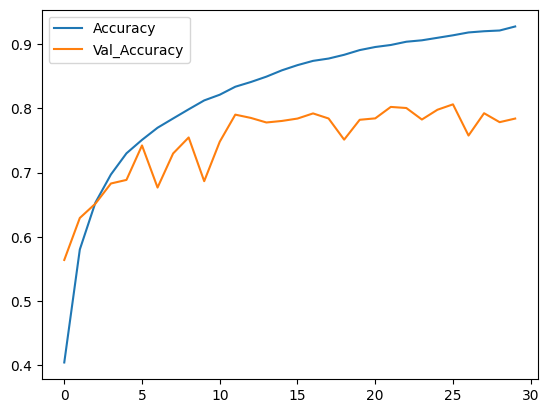

In [14]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [15]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step


In [16]:
predictions=np.array(predictions)
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [17]:
submission=pd.DataFrame({
    'id':range(1,len(predictions)+1),
    'label':[labels[pred] for pred in predictions]
})

In [18]:
submission.head()

,id,label
0,1,cat
1,2,ship
2,3,ship
3,4,airplane
4,5,frog


In [19]:
submission.to_csv('submission.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


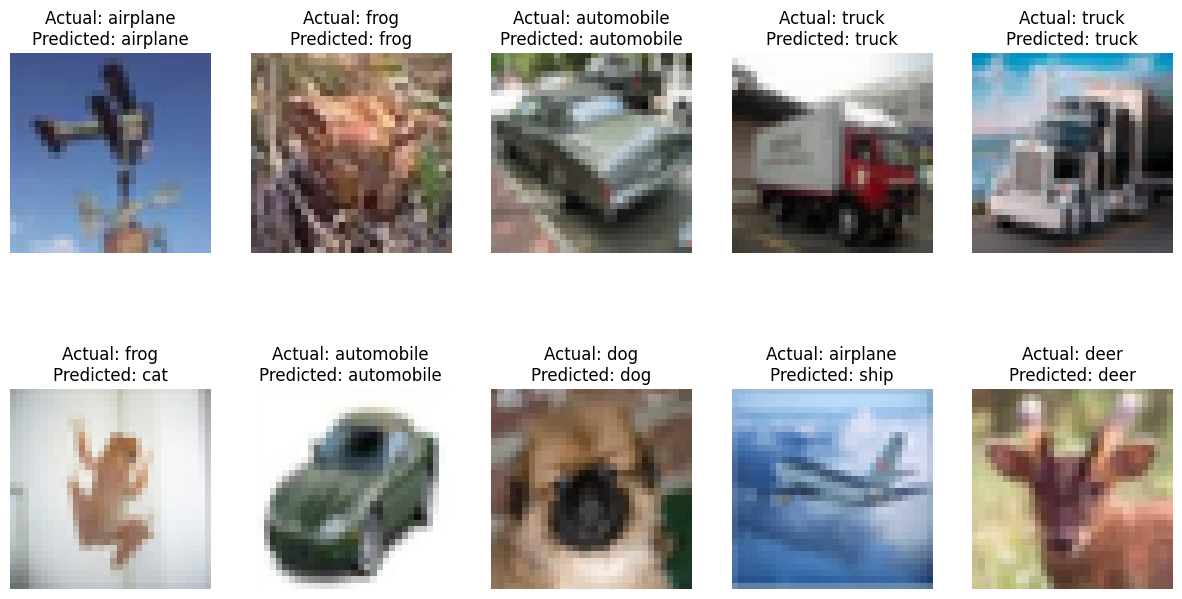

In [20]:
random_indices = np.random.choice(len(x_test), size=10, replace=False)
x_test_resized = x_test[random_indices]

predictions = model.predict(x_test_resized)

predicted_labels = np.argmax(predictions, axis=1)

actual_labels = y_test[random_indices]

plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Actual: {labels[actual_labels[i][0]]}\nPredicted: {labels[predicted_labels[i]]}")
    plt.axis('off')
plt.show()
